In [10]:
import sympy as sp
from IPython.display import display, Latex
import matplotlib.pyplot as plt
import numpy as np

# Definir símbolos
m, b, k, t = sp.symbols('m b k t')
lambda_ = sp.symbols('lambda', complex=True)

# Ecuación característica
characteristic_eq = m * lambda_**2 + b * lambda_ + k

# Resolver la ecuación característica
solutions = sp.solve(characteristic_eq, lambda_)

# Mostrar las soluciones
display(Latex(f"Ecuación característica: $${sp.latex(characteristic_eq)}$$"))
display(Latex(f"Soluciones: $${sp.latex(solutions)}$$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [11]:
# Caso sobreamortiguado: b^2 > 4mk
b_val = 10
m_val = 1
k_val = 2
# Discriminante > 0
assert b_val**2 > 4 * m_val * k_val
solutions_sobreamortiguado = [sol.subs({b: b_val, m: m_val, k: k_val}) for sol in solutions]

# Mostrar las soluciones para sobreamortiguado
display(Latex(f"Soluciones para $b^2 > 4mk$: $${sp.latex(solutions_sobreamortiguado)}$$"))

<IPython.core.display.Latex object>

In [12]:
# Caso críticamente amortiguado: b^2 = 4mk
b_val = 4
m_val = 1
k_val = 4
# Discriminante == 0
assert b_val**2 == 4 * m_val * k_val
solutions_critico = [sol.subs({b: b_val, m: m_val, k: k_val}) for sol in solutions]

# Mostrar las soluciones para críticamente amortiguado
display(Latex(f"Soluciones para $b^2 = 4mk$: $${sp.latex(solutions_critico)}$$"))

<IPython.core.display.Latex object>

In [13]:
# Caso subamortiguado: b^2 < 4mk
b_val = 2
m_val = 1
k_val = 3
# Discriminante < 0
assert b_val**2 < 4 * m_val * k_val
solutions_subamortiguado = [sol.subs({b: b_val, m: m_val, k: k_val}) for sol in solutions]

# Mostrar las soluciones para subamortiguado
display(Latex(f"Soluciones para $b^2 < 4mk$: $${sp.latex(solutions_subamortiguado)}$$"))

<IPython.core.display.Latex object>

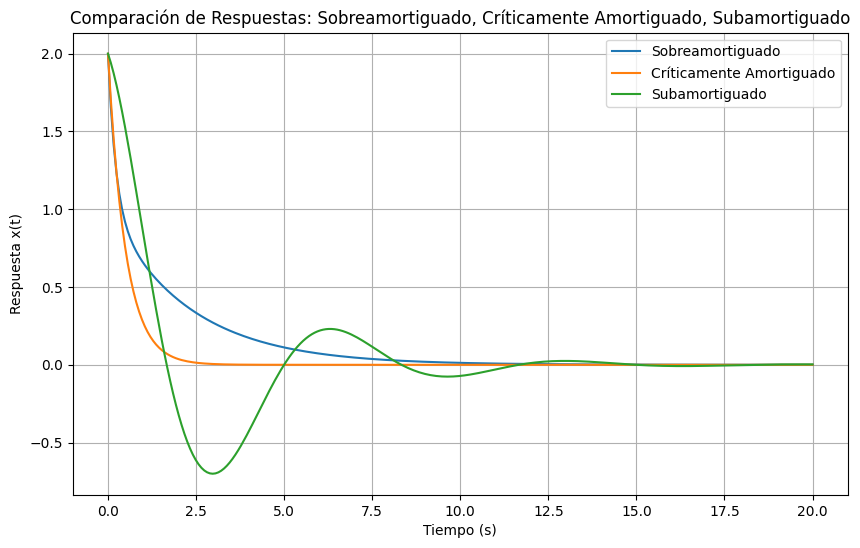

In [31]:
def compute_response(solutions, time, params):
    total_response = np.zeros_like(time, dtype=np.complex128)  # Use np.complex128 to handle complex calculations
    for sol in solutions:
        lambda_val = complex(sol.evalf(subs=params))  # Convert SymPy solution to Python complex number
        response = np.exp(lambda_val.real * time) * (np.cos(lambda_val.imag * time) + 1j * np.sin(lambda_val.imag * time))
        total_response += response
    return total_response.real  # Return only the real part of the response for physical relevance

def add_plot(ax, case_name, solutions, params, time):
    response = compute_response(solutions, time, params)
    ax.plot(time, response, label=f'{case_name}')

# Define symbols and solve characteristic equation
m, b, k, t = sp.symbols('m b k t')
lambda_ = sp.symbols('lambda', complex=True)
characteristic_eq = m * lambda_**2 + b * lambda_ + k
solutions = sp.solve(characteristic_eq, lambda_)

# Time array for the simulation
time = np.linspace(0, 20, 250)

# Create a plot figure
fig, ax = plt.subplots(figsize=(10, 6))

# Parameters for each damping case and plot each one
params_sobreamortiguado = {m: 1, b: 5, k: 2}
add_plot(ax, "Sobreamortiguado", solutions, params_sobreamortiguado, time)

params_critico = {m: 1, b: 4, k: 4}
add_plot(ax, "Críticamente Amortiguado", solutions, params_critico, time)

params_subamortiguado = {m: 3, b: 2, k: 3}
add_plot(ax, "Subamortiguado", solutions, params_subamortiguado, time)

# Finalize the plot
ax.set_title('Comparación de Respuestas: Sobreamortiguado, Críticamente Amortiguado, Subamortiguado')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Respuesta x(t)')
ax.legend()
ax.grid(True)
plt.show()


In [1]:
import numpy as np
from scipy.optimize import minimize

# Definir la función objetivo
def objective(x):
    return (x[0]-5)**2 + (x[1]-5)**2

# Definir las restricciones
constraints = [
    {'type': 'ineq', 'fun': lambda x: 6 - (2 * x[0] - x[1])},
    {'type': 'ineq', 'fun': lambda x: 12 - (x[0] + 3 * x[1])},
    {'type': 'ineq', 'fun': lambda x: x[0]},
    {'type': 'ineq', 'fun': lambda x: x[1]}
]

# Definir el punto inicial
x0 = np.array([1, 2])

# Resolver el problema de optimización
solution = minimize(objective, x0, method='SLSQP', constraints=constraints)
x_opt = solution.x

print(f'Solución óptima: x1 = {x_opt[0]}, x2 = {x_opt[1]}')
print(f'Valor óptimo de la función objetivo: {solution.fun}')


Solución óptima: x1 = 4.19999999222039, x2 = 2.6000000025931733
Valor óptimo de la función objetivo: 6.400000000000143
